## 1. Load & clean data

In [82]:
# imports libraries
import pandas as pd
import numpy as np
from transformers import pipeline
from tqdm import tqdm

In [83]:
# 1. read data file
df = pd.read_excel("data/amazon_product_reviews.xlsx", sheet_name=0, engine='openpyxl')

In [84]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Remove non-printable and control characters
        return re.sub(r'[^\x20-\x7E\u0600-\u06FF]', '', text)
    return text

# --- Clean numeric-like columns  ---
numeric_like_cols = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in numeric_like_cols:
    if col in df.columns:
        # Remove non-digit characters (keep dot)
        df[col] = df[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
        # Convert to float; invalids become NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# save cleaned data
df.to_excel("data/amazon_product_reviews_cleaned.xlsx", index=False, engine='openpyxl')

In [86]:
print("First 5 rows:")
display(df.head())

print(f"\n Shape of dataset: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n Info:")
df.info()

print("\n Missing values per column:")
print(df.isnull().sum())

print("\n Duplicates:", df.duplicated().sum())

print("\n Summary stats:")
display(df.describe())


First 5 rows:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...



 Shape of dataset: 1465 rows × 16 columns

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096585,18295.541353
std,6944.304394,10874.826864,0.216359,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [87]:
# --- Handle nulls in numeric columns using median ---
numeric_like_cols = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in numeric_like_cols:
    if col in df.columns:
        # Fill nulls with median (NaN if column fully null)
        df[col] = df[col].fillna(df[col].median())

# they don't have text null: Handle nulls in text/object columns
# for col in df.select_dtypes(include='object').columns:
#     df[col] = df[col].fillna("Unknown")

# --- Save cleaned data ---
df.to_excel("data/amazon_product_reviews_cleaned.xlsx", index=False, engine='openpyxl')

print("✅ Data cleaned & null values handled successfully!")
print(df.isnull().sum())



✅ Data cleaned & null values handled successfully!
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [88]:
# Outliers
print("\nالأعمدة المرشحة لوجود Outliers (قيم متطرفة):")
numeric_cols = df.select_dtypes(include="number").columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"- {col}: {len(outliers)} outliers")


الأعمدة المرشحة لوجود Outliers (قيم متطرفة):
- discounted_price: 217 outliers
- actual_price: 213 outliers
- discount_percentage: 0 outliers
- rating: 74 outliers
- rating_count: 141 outliers


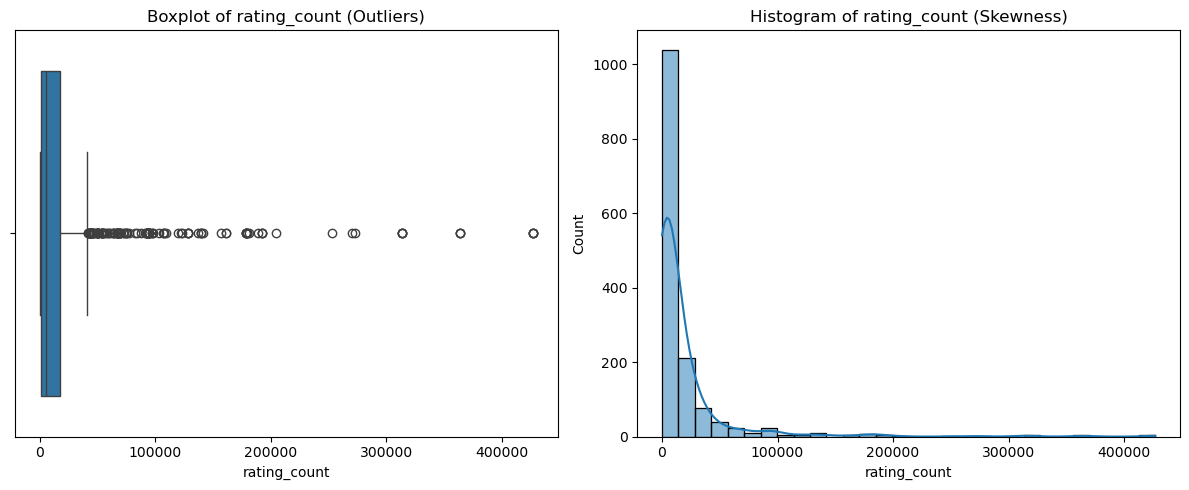

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

#column which have the null value
col = 'rating_count'  

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df[col])
plt.title(f'Boxplot of {col} (Outliers)')

plt.subplot(1,2,2)
sns.histplot(df[col].dropna(), bins=30, kde=True)
plt.title(f'Histogram of {col} (Skewness)')

plt.tight_layout()
plt.show()

## 2. EDA (Exploratory Data Analysis)

#### 2.1 Numerical columns analysis: discounted_price, actual_price, discount_percentage, rating, rating_count.

In [90]:
# Summary statistics
print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe())

# Top selling products (by rating_count or revenue)
df['revenue'] = df['discounted_price'] * df['rating_count']
top_sales = df.sort_values(by='revenue', ascending=False).head(10)
print(top_sales[['product_name', 'revenue', 'rating_count', 'discounted_price']])


       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096587   
std         6944.304394   10874.826864             0.216359     0.291574   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  
count    1465.000000  
mean    18277.634812  
std     42727.398216  
min         2.000000  
25%      1191.000000  
50%      5179.000000  
75%     17325.000000  
max    426973.000000  
                                          product_name       revenue  \
370  Redmi 9 Activ (Carbon Black, 4G

#### 2.2 Categorical analysis: category

In [91]:
# Count products per category
category_counts = df['category'].value_counts()
print(category_counts.head(10))

# If categories are separated by ">"
df['main_category'] = df['category'].apply(lambda x: x.split("|")[0].strip())
main_category_counts = df['main_category'].value_counts()
print(main_category_counts)


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons     24
Computers&

## 3. Feature Engineering

In [92]:
# Discount as boolean flag
df['has_discount'] = df['discount_percentage'] > 0

# Review length
df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))

# Product popularity score
df['popularity'] = df['rating'] * df['rating_count']


## 4. Sentiment Analysis

Using a Hugging Face pretrained model (distilbert-base-uncased-finetuned-sst-2-english):

In [94]:
from transformers import pipeline

# Sentiment analysis pipeline
sentiment_model = pipeline("sentiment-analysis")

# Function to handle long reviews safely
def get_sentiment(text):
    text = str(text).strip()
    if not text:   # Handle empty reviews
        return {"label": "NEUTRAL", "score": 0.0}
    # Truncate to 512 characters (safe for most transformer models)
    result = sentiment_model(text[:512])[0]
    return result

# Apply safely
df['review_sentiment'] = df['review_content'].apply(lambda x: get_sentiment(x)['label'])
df['sentiment_score']  = df['review_content'].apply(lambda x: get_sentiment(x)['score'])

# Check sentiment distribution
print(df['review_sentiment'].value_counts())



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


review_sentiment
POSITIVE    894
NEGATIVE    571
Name: count, dtype: int64


## 5. Visualization

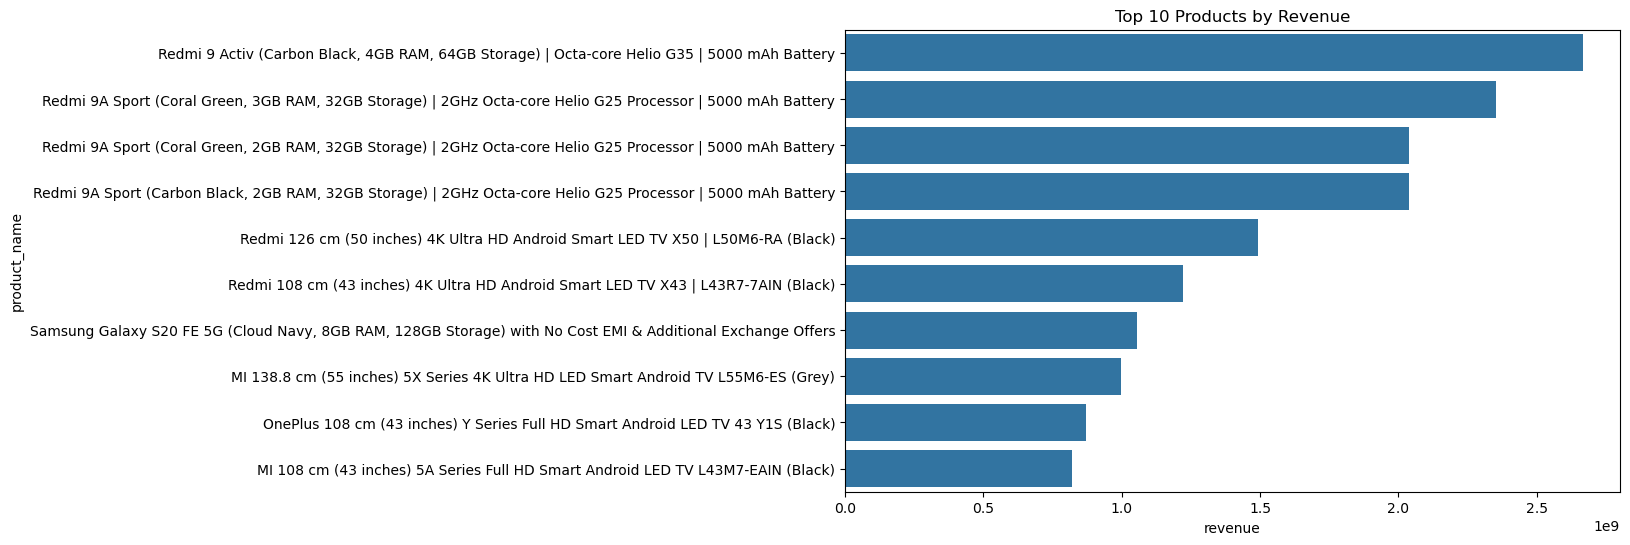

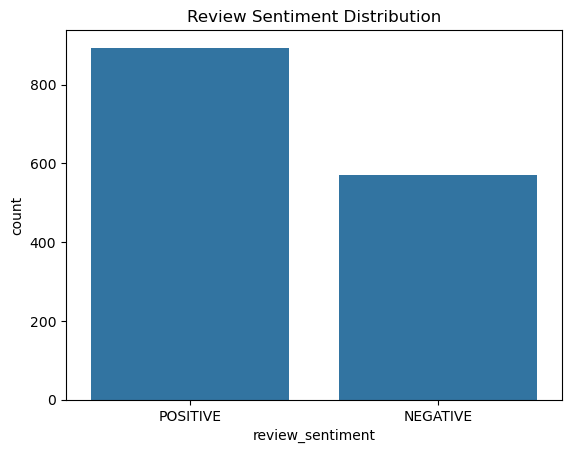

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 products by revenue
plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='product_name', data=top_sales)
plt.title("Top 10 Products by Revenue")
plt.show()

# Sentiment distribution
sns.countplot(x='review_sentiment', data=df)
plt.title("Review Sentiment Distribution")
plt.show()